In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# We first decided to check for any trends in the wording of summary, space and description

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


           Frequency
Word                
downtown         923
seattle          904
private          859
located          840
walk             758
apartment        737
bedroom          730
home             702
bus              698
room             675


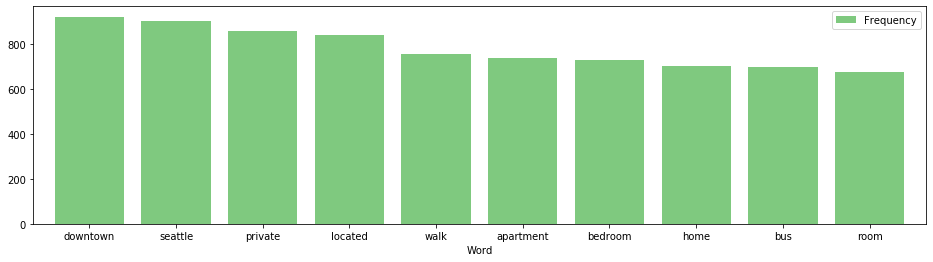

In [2]:
listings = pd.read_csv("listings.csv", header = 0)

from collections import Counter
import nltk
nltk.download('stopwords')

df = listings[['summary', 'space', 'description']]
top_N = 10

stopwords = nltk.corpus.stopwords.words('english')

# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
summary_words_list = df['summary'].str.lower().replace([r'\|', RE_stopwords], [' ', ''], regex=True).str.cat(sep=' ').split()

for word in summary_words_list:
    if word == '&':
        summary_words_list.remove('&')

summary_words = (summary_words_list)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(summary_words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,4), width=0.8, cmap='Accent')

         Frequency
Word              
room          2027
bedroom       1398
living        1344
one           1319
space         1302
queen         1265
full          1242
kitchen       1225
seattle       1222
bed           1180


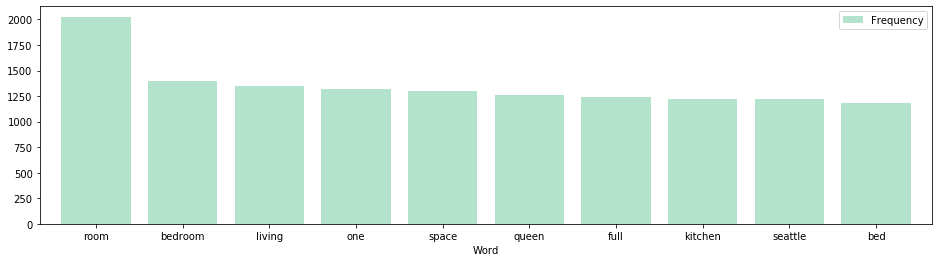

In [3]:
space_words_list = df['space'].str.lower().replace([r'\|', RE_stopwords], [' ', ''], regex=True).str.cat(sep=' ').split()

for word in space_words_list:
    if word == "'":
        space_words_list.remove("'")
    elif word == "-":
        space_words_list.remove("-")

space_words = (space_words_list)
                                                  
# generate DF out of Counter
rslt = pd.DataFrame(Counter(space_words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,4), width=0.8, cmap='Pastel2')

           Frequency
Word                
room            2886
seattle         2476
bedroom         2215
private         2205
apartment       2058
one             2054
downtown        2035
space           1974
full            1955
access          1950


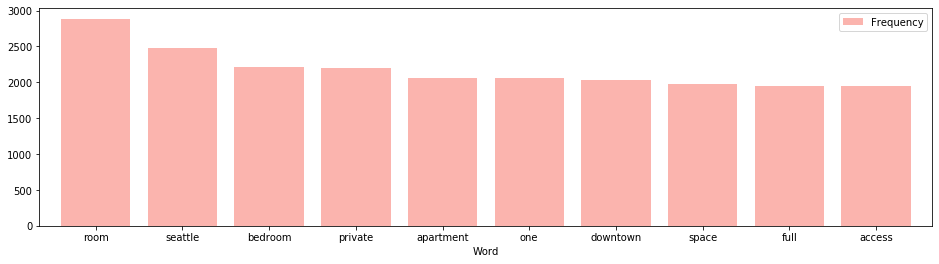

In [4]:
desc_words_list = df['description'].str.lower().replace([r'\|', RE_stopwords], [' ', ''], regex=True).str.cat(sep=' ').split()

for word in desc_words_list:
    if word == "'":
        desc_words_list.remove("'")

desc_words = (desc_words_list)
                                                  
# generate DF out of Counter
rslt = pd.DataFrame(Counter(desc_words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,4), width=0.8, cmap='Pastel1')

# From this analysis, we can see that from the wording of all the airbnb summaries, the word downtown is most common.
Downtown is the location of the airbnb, hence we shall analyse the location of the airbnb with regards to revenue later on. 
# The two other most common words in description and space would be room.
This tells us that the rooms within the airbnb would be of some importance, hence we shall analyse if the number of rooms will affect price of the airbnb. Price would inevitably affect estimated revenue. We will conduct more in-depth analysis later on.

# First we need to clean the listings data because there are a lot of null values

In [5]:
listings = listings[['id','name','neighbourhood_group_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','amenities','price','guests_included','minimum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

# clean the data
listings['price'] = listings['price'].str.replace("[$, ]", "").astype("float")
listings.loc[listings["bathrooms"].isnull()] = 0
listings.loc[listings["bedrooms"].isnull()] = 0
listings.loc[listings["beds"].isnull()] = 0
listings.loc[listings["review_scores_rating"].isnull()] = 0
listings.loc[listings["review_scores_accuracy"].isnull()] = 0
listings.loc[listings["review_scores_cleanliness"].isnull()] = 0
listings.loc[listings["review_scores_communication"].isnull()] = 0
listings.loc[listings["review_scores_location"].isnull()] = 0
listings.loc[listings["review_scores_value"].isnull()] = 0

listings.head(20)

,id,name,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,guests_included,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,Stylish Queen Anne Apartment,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,...,2,1,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,Bright & Airy Queen Anne Apartment,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,...,1,2,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,New Modern House-Amazing water view,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,...,10,4,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,0,0,0,0.000000,0.000000,0,0,0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,278830,Charming craftsman 3 bdm house,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,...,6,1,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0
5,5956968,Private unit in a 1920s mansion,Queen Anne,47.630525,-122.366174,House,Private room,2,1.0,1.0,...,1,1,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0
6,1909058,Queen Anne Private Bed and Bath,Queen Anne,47.636605,-122.368519,House,Private room,2,1.0,1.0,...,1,3,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0
7,856550,Tiny Garden cabin on Queen Anne,Queen Anne,47.640161,-122.375856,Cabin,Private room,2,1.0,1.0,...,1,2,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0
8,4948745,Urban Charm || Downtown || Views,Queen Anne,47.632410,-122.357216,Apartment,Private room,2,1.0,1.0,...,1,3,8,97.0,10.0,9.0,10.0,9.0,10.0,10.0
9,2493658,Airy + Bright Queen Anne Apartment,Queen Anne,47.637492,-122.366889,Apartment,Entire home/apt,4,1.0,1.0,...,1,2,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0


# Read reviews data

In [6]:
reviews = pd.read_csv("reviews.csv", header = 0)
reviews = reviews[['id', 'listing_id', 'date']]
# convert date to pandas datetime
reviews['date'] = pd.to_datetime(reviews['date'])

reviews.head()

,id,listing_id,date
0,38917982,7202016,2015-07-19
1,39087409,7202016,2015-07-20
2,39820030,7202016,2015-07-26
3,40813543,7202016,2015-08-02
4,41986501,7202016,2015-08-10


In [7]:
# calculate number of reviews for each listing
reviews_id = reviews[['listing_id','id']].groupby(['listing_id']).count()
reviews_id.columns = ['numOfReviews']

reviews_id.head()

,numOfReviews
listing_id,
4291,35
5682,297
6606,52
7369,40
9419,79


# Find out if the minimum number of nights affect the estimated revenue

In [8]:
# rename id in listings dataframe to listing_id
listings.rename(columns={'id':'listing_id'}, inplace=True)

reviews = pd.merge(reviews, reviews_id, on='listing_id')

# get estimated bookings based on reviews
bookings = pd.merge(reviews, listings, on='listing_id')

# get rid of anomalies of unusually high number of minimum nights
bookings = bookings[bookings['minimum_nights'] <= 30]

# let number of reviews be the estimated number of bookings. Thus price will be the number of bookings multiplied by the price and number of nights.
bookings['estimatedRevenue'] = bookings['price'] * bookings['minimum_nights'] * bookings['numOfReviews']

# get revenue by listings
listings_revenue = bookings[['listing_id','estimatedRevenue']].groupby(['listing_id']).sum()

listings = pd.merge(listings, listings_revenue, on='listing_id', how='left')
listings.loc[listings["estimatedRevenue"].isnull()] = 0

listings.head()

,listing_id,name,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,estimatedRevenue
0,241032,Stylish Queen Anne Apartment,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,...,1,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,3642165.0
1,953595,Bright & Airy Queen Anne Apartment,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,...,2,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,554700.0
2,3308979,New Modern House-Amazing water view,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,...,4,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1560000.0
3,0,0,0,0.000000,0.000000,0,0,0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,278830,Charming craftsman 3 bdm house,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,...,1,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,649800.0


In [9]:
# top 5 highest revenue listings
listings[['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimatedRevenue']].sort_values('estimatedRevenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimatedRevenue
1447,208356,474,1,2,1.0,1.0,19996164.0
1441,365550,466,1,2,1.0,1.0,19326884.0
2568,63308,320,2,2,1.0,1.0,18227200.0
1592,9460,240,3,2,1.0,1.0,17107200.0
1537,1954452,71,14,2,1.0,1.0,15526280.0


**Now we check the correlation between the minimum number of nights and estimatedRevenue**

In [10]:
listings[['minimum_nights','estimatedRevenue']].corr()

,minimum_nights,estimatedRevenue
minimum_nights,1.000000,0.137395
estimatedRevenue,0.137395,1.000000


**As we can see, there is no correlation between the minimum number of nights and estimated revenue. Time to move on to the next variable.**

# Find out if the time of the year affect estimated revenue

[]

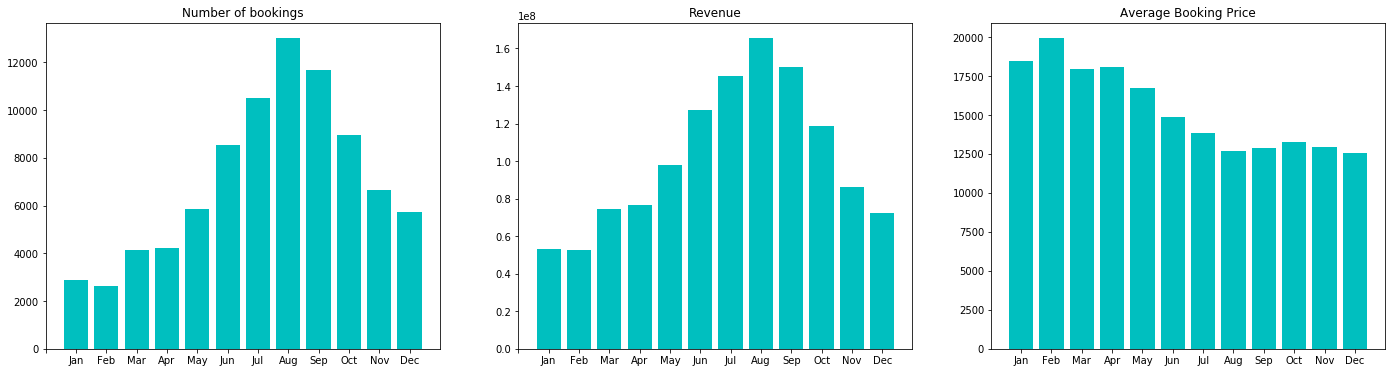

In [11]:
plt.figure(figsize=(24, 6))

# bookings by month
plotdata = reviews[['date']].groupby(reviews["date"].dt.month).count()
plotdata.rename(columns={'date':'# of bookings'}, inplace=True)

ax = plt.subplot(1, 3, 1)
ax.set_title("Number of bookings")
bars = (' ', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
y_pos = np.arange(len(bars))
plt.bar(plotdata.index, plotdata['# of bookings'], color=('c'))
plt.xticks(y_pos, bars)

# revenue by month
plotdata2 = bookings[['date','estimatedRevenue']].groupby(bookings["date"].dt.month).sum()
plotdata2.rename(columns={'estimatedRevenue':'revenue'}, inplace=True)

ax = plt.subplot(1, 3, 2)
ax.set_title("Revenue")
bars = (' ', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
y_pos = np.arange(len(bars))
plt.bar(plotdata2.index, plotdata2['revenue'], color='c')
plt.xticks(y_pos, bars)

# avg booking price by month
plotdata3 = pd.concat([plotdata, plotdata2], axis=1)
plotdata3['avg booking price'] = plotdata3['revenue'] / plotdata3['# of bookings']

ax = plt.subplot(1, 3, 3)
ax.set_title("Average Booking Price")
bars = (' ', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
y_pos = np.arange(len(bars))
plt.bar(plotdata3.index, plotdata3['avg booking price'], color='c')
plt.xticks(y_pos, bars)

plt.plot()

**We can see that July, August and September are the best periods to maximise revenue.**

count    3139.000000
mean       25.911441
std        18.329176
min         0.527778
25%        14.000000
50%        21.500000
75%        33.000000
max       275.000000
Name: price_per_night, dtype: float64


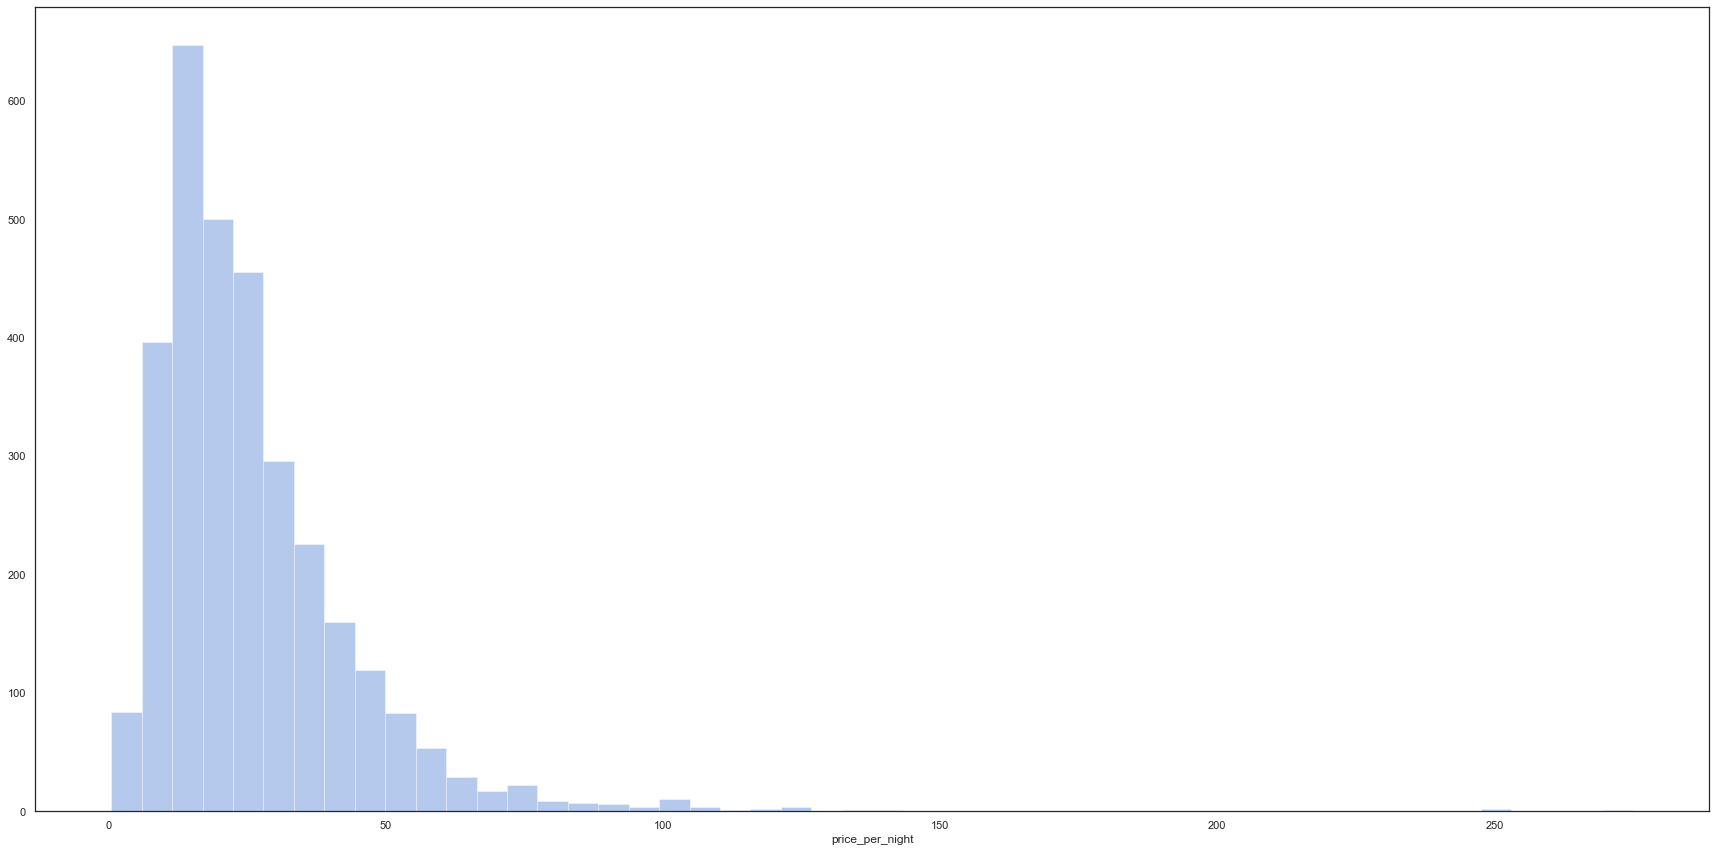

In [12]:
# calculating the price per pax per night
listings['price_per_night'] = listings['price'] / listings['accommodates'] / listings['minimum_nights']

sb.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(24, 12))

# plot a simple histogram with binsize determined automatically
sb.distplot(listings['price_per_night'], kde=False, color="b")

plt.tight_layout()

print(listings['price_per_night'].describe())

**Let's find out what is considered above average price per night**

In [13]:
# Inter-quartile range
IQR = 33.0- 14.0
print("Above average price = $", 1.5*IQR + 33.0)

Above average price = $ 61.5


**Now we plot the locations where the listings are above average price**

Distribution of Pricey Airbnbs in Seattle


[]

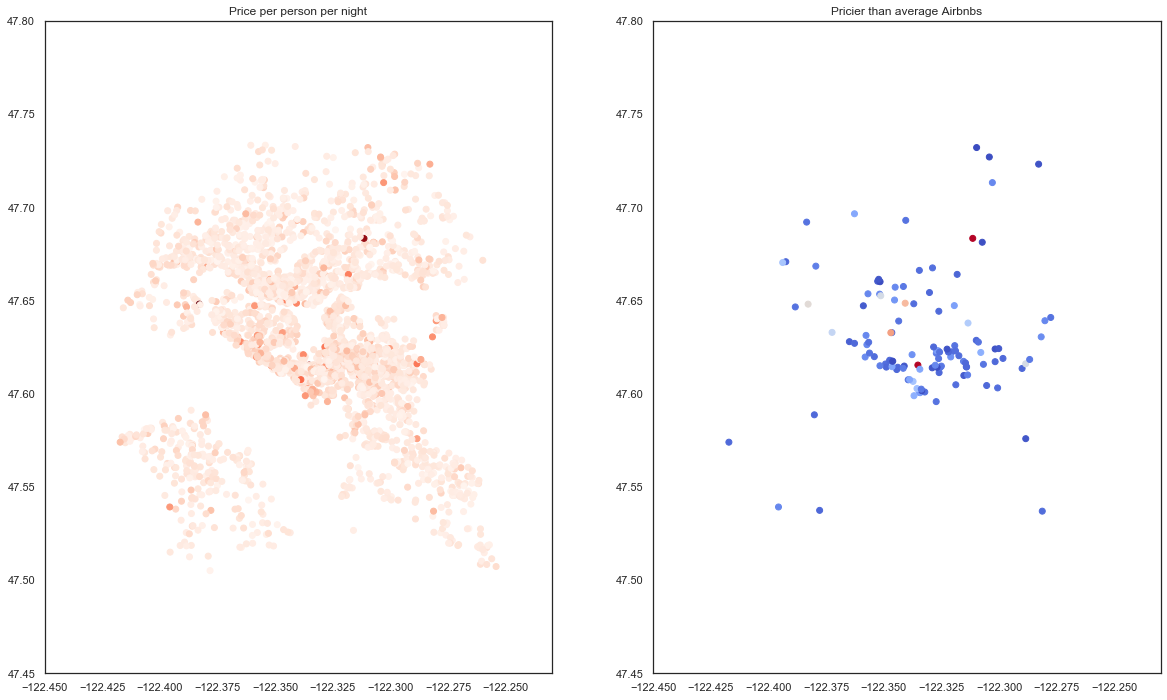

In [14]:
filter_price_gt = 61.5

plt.figure(figsize=(20, 12))

# Scatter plot of all the Airbnbs according to their geographic location
ax = plt.subplot(1, 2, 1)
ax.set_title("Price per person per night")

ax.set_autoscaley_on(False)
ax.set_ylim([47.45, 47.8])
ax.set_autoscalex_on(False)
ax.set_xlim([-122.45, -122.23])
plt.scatter(listings["longitude"],
            listings["latitude"],
            cmap="Reds",
            c=listings["price_per_night"] / listings["price_per_night"].max())

# Scatter plot of Pricey Airbnbs according to their geographic location
ax = plt.subplot(1, 2, 2)
ax.set_title("Pricier than average Airbnbs")

ax.set_autoscaley_on(False)
ax.set_ylim([47.45, 47.8])
ax.set_autoscalex_on(False)
ax.set_xlim([-122.45, -122.23])
plt.scatter(listings[listings['price_per_night'] > filter_price_gt]["longitude"],
            listings[listings['price_per_night'] > filter_price_gt]["latitude"],
            cmap="coolwarm",
            c=listings[listings['price_per_night'] > filter_price_gt]["price"] / listings[listings['price_per_night'] > filter_price_gt]["price"].max())

print("Distribution of Pricey Airbnbs in Seattle")
plt.plot()

**Pricey listings are actually quite scattered except for the small cluster in the middle. Let's find out if the neighbourhood affects revenue.**

# Find out which neighbourhood has the highest revenue

                              estimatedRevenue
neighbourhood_group_cleansed                  
Downtown                          20335.553582
Queen Anne                        19287.761501
Cascade                           18116.671127
Capitol Hill                      16713.394595
Ballard                           16455.179123
Central Area                      12821.896327
Other neighborhoods               12433.489648
Delridge                          12297.849795
Northgate                         10990.425498
Rainier Valley                    10602.981953
Seward Park                       10252.794979
West Seattle                       9129.924645
Beacon Hill                        8400.092807
Magnolia                           7581.019293
Lake City                          6562.298638
University District                4710.605484
Interbay                           3464.447154


[]

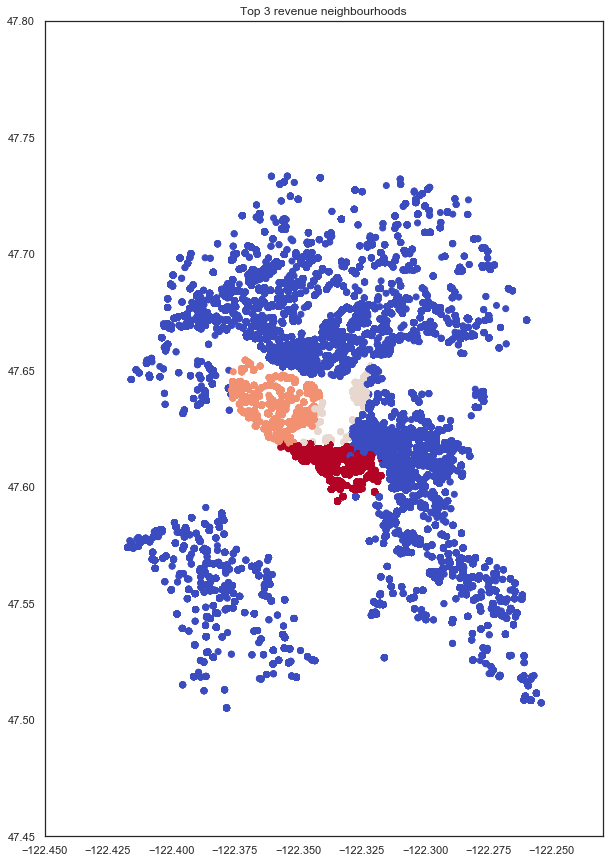

In [15]:
# estimated revenue of all neighbourhoods
neighbourhoodRevenue = bookings[['neighbourhood_group_cleansed','estimatedRevenue']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('estimatedRevenue', ascending=False)
print(neighbourhoodRevenue)


# Scatter plot of the top 3 neighbourhoods contrasted with the rest of the listings 
listingsPlotDF = bookings[['neighbourhood_group_cleansed','longitude','latitude','estimatedRevenue']]
listingsPlot = listingsPlotDF.copy()
listingsPlot['color'] = 0

color_value = 1
for neighbourhood in neighbourhoodRevenue.iloc[:3].index:
    listingsPlot.loc[bookings['neighbourhood_group_cleansed'] == neighbourhood, 'color'] = color_value
    color_value -= 0.23

plt.figure(figsize=(10, 15))
ax = plt.subplot(1, 1, 1)
ax.set_title("Top 3 revenue neighbourhoods")

ax.set_autoscaley_on(False)
ax.set_ylim([47.45, 47.8])
ax.set_autoscalex_on(False)
ax.set_xlim([-122.45, -122.23])
plt.scatter(listingsPlot['longitude'],
            listingsPlot['latitude'],
            cmap="coolwarm",
            c=listingsPlot['color']
           )

plt.plot()

**Downtown, Queen Anne and Cascade are the top 3 neighbourhoods for airbnb revenue.**

Let's compare with the Seattle Neighbourhood Map

![title](seattle.png)

Yup it looks correct!

**It seems that it is difficult to use neighbourhoods to predict revenue as the only cluster is these 3  neighbourhoods. Time to move on to the next variable.**

# Find out if Ratings affect Revenue

**Let's first find out which factors play a part in high ratings**

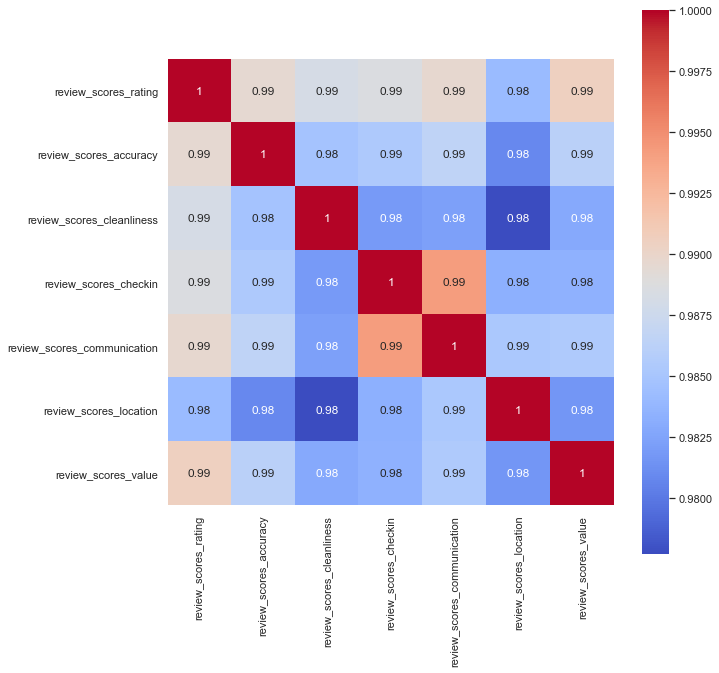

In [16]:
# correlation heatmap of the factors that affect ratings
listings_reviews = listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

plt.figure(figsize=(10, 10))
sb.heatmap(listings_reviews.corr(), annot = True, cmap= 'coolwarm', square=True)

We can infer that hosts with good communication tend to lead to high overall ratings. The rest of the factors have high positive correlation to good ratings too.

**Okay now let's find out the correlation between good ratings and revenue**

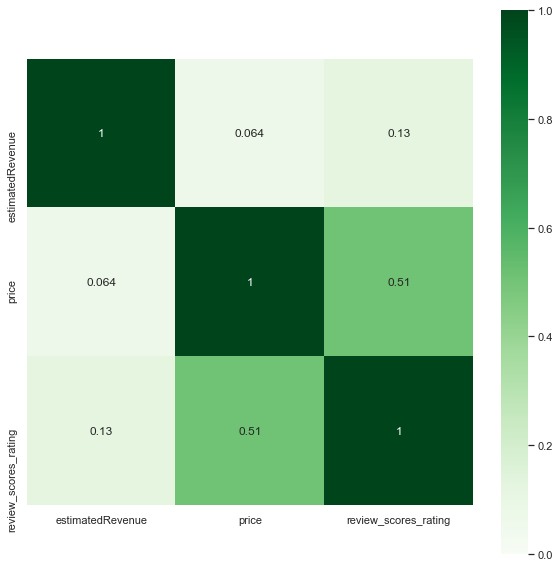

In [17]:
# correlation heatmap of price and revenue
plt.figure(figsize=(10, 10))
ratings_revenue_corr = pd.DataFrame(listings[['estimatedRevenue','price','review_scores_rating']])
sb.heatmap(ratings_revenue_corr.corr(), vmin=0, vmax=1, annot = True, cmap= 'Greens', square=True)

**Surprisingly, good reviews have very little positive correlation with revenue. Good reviews also have weak/moderate correlation to the price of the listings. After exploring so many factors, let's explore the 'price' of the airbnbs as it has obviously the highest positive correlation with revenue**

# Since price of airbnb will affect calculation of estimated revenue, we need to go to the core of the problem. We need to find the factors affecting price.

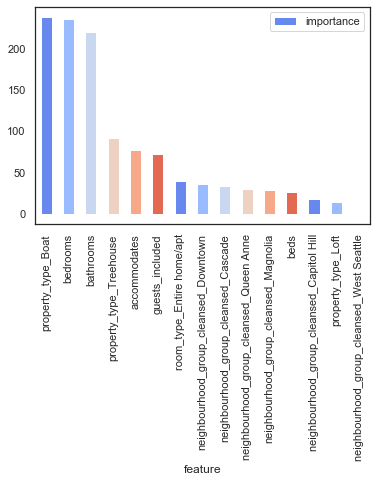

In [26]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

min_max_scaler = preprocessing.MinMaxScaler()
# this estimator scales and translate each feature individually such that  it is in the given range on the training set
# such that it is for example between 0 and 1, to make the variables more fair

model_x = listings.copy()
model_x = model_x[['neighbourhood_group_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','guests_included']]
model_x['accommodates'] = min_max_scaler.fit_transform(model_x[['accommodates']])
model_x['bathrooms'] = min_max_scaler.fit_transform(model_x[['bathrooms']])
model_x['bedrooms'] = min_max_scaler.fit_transform(model_x[['bedrooms']])
model_x['beds'] = min_max_scaler.fit_transform(model_x[['beds']])
model_x['guests_included'] = min_max_scaler.fit_transform(model_x[['guests_included']])

model_x = pd.get_dummies(model_x, columns=['neighbourhood_group_cleansed','property_type','room_type'])
# convert categorical data into dummy variables
model_y = listings['price']

X_train, X_test, y_train, y_test = train_test_split(model_x, model_y, test_size=0.15)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': linreg.coef_})
_ = coefficients.sort_values('importance', ascending=False)[:15].plot(x='feature', y='importance', kind='bar', color=sb.color_palette('coolwarm'))

A linear regression model doesn't seem reliable, and is quite wonky let's move on to a decision tree

# We use a decision tree to find out which airbnb features have the most weight

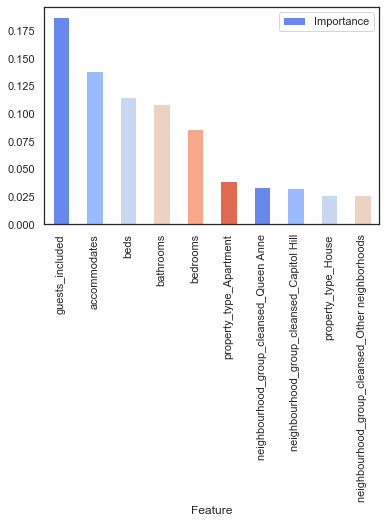

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

tree = tree.DecisionTreeClassifier(
    class_weight="balanced")
tree = tree.fit(X_train,y_train)

importances = tree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
tree_result.sort_values(by='Importance',ascending=False)[:10].plot(x='Feature', y='Importance', kind='bar', color=sb.color_palette('coolwarm'))

**Using a decision tree model may have some inaccuracies, how about a more accurate model?**

# Using Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# prepare train and test datasets for modelling
TEST_SIZE = 0.3
RAND_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(model_x, model_y, test_size=TEST_SIZE, random_state=RAND_STATE)

In [29]:
# train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

# calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 1057.109, test: 2828.144
Random Forest R^2 train: 0.881, test: 0.703


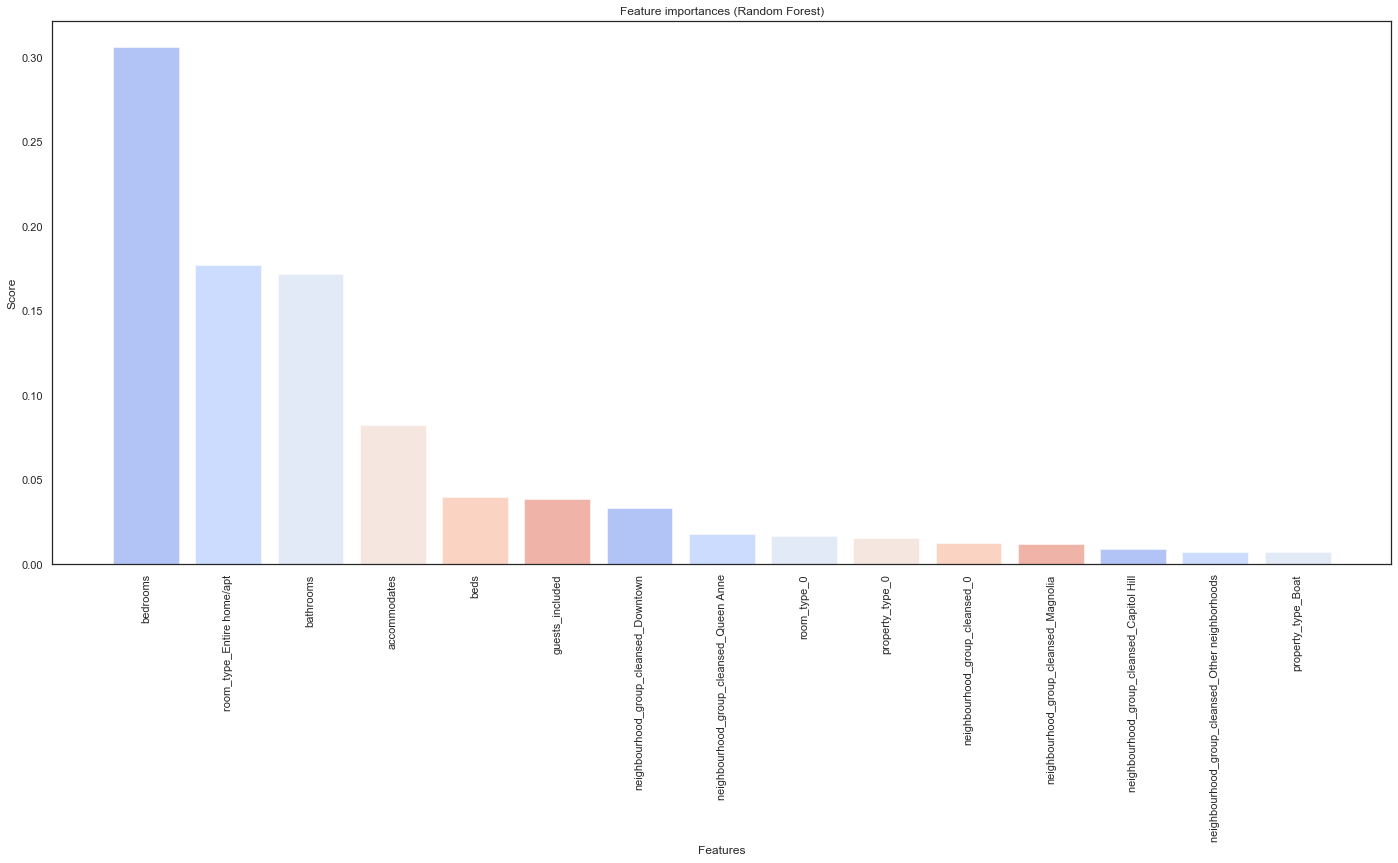

In [30]:
# get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

# plot feature importances
plt.figure(figsize=(24,10))
plt.bar(y_pos, scores, align='center', alpha=0.5, color=sb.color_palette('coolwarm'))
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

# plt.savefig('feature importances RF.png')
 
plt.show()

**Let's cross check this with another model!**

# Using XGBoost

In [36]:
import xgboost

#train XGBoost model
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGBoost MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('XGBoost R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

XGBoost MSE train: 1238.745, test: 2819.333
XGBoost R^2 train: 0.860, test: 0.704


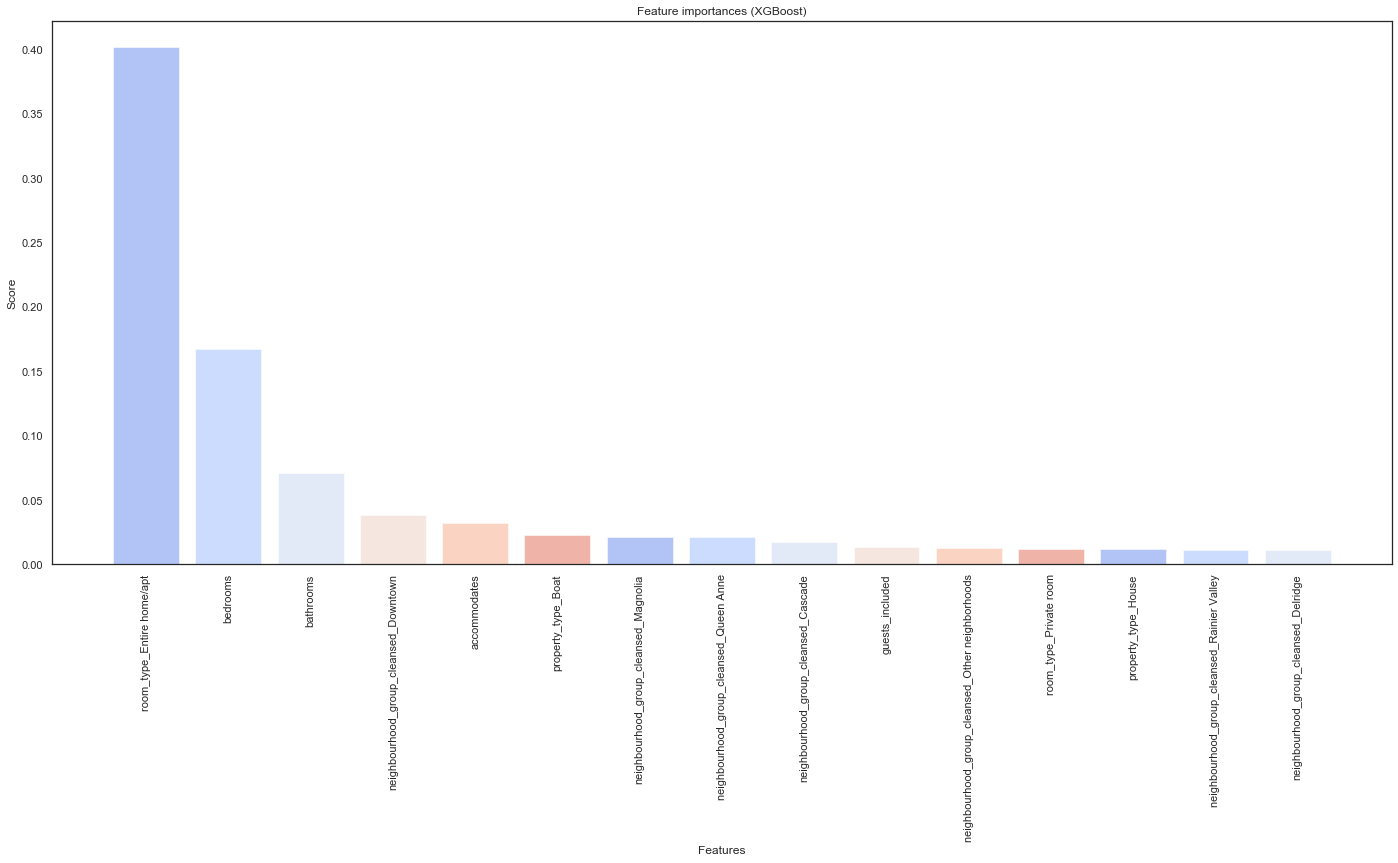

In [33]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = xgb_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = xgb_feature_importances['score'][:15]
 
plt.figure(figsize=(24,10))
plt.bar(y_pos, scores, align='center', alpha=0.5, color=sb.color_palette('coolwarm'))
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (XGBoost)')

# plt.savefig('feature importances XGB.png')
 
plt.show()

**From the Random Forest model and XGBoost model, we can see that the overlapping top 3 factors are number of bedrooms, number of bathrooms and whether the entire apartment is being rented out**

# Now that we found out the most important factors affecting price, let's analyse the relationships between these factors and price

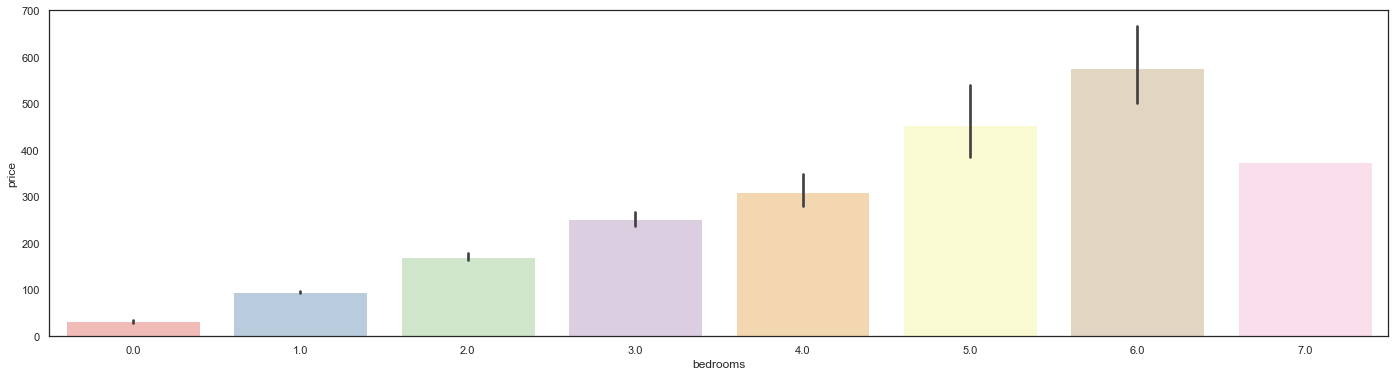

In [25]:
plt.figure(figsize=(24,6))
sb.barplot(x=listings['bedrooms'], y=listings['price'], palette="Pastel1")

It seems that more bedrooms will increase the price of listings (until 6 bedrooms)

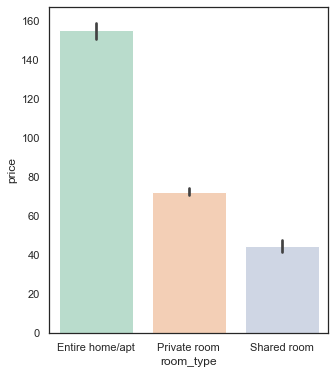

In [35]:
plt.figure(figsize=(5,6))
roomtype = listings.copy()
roomtype.loc[roomtype["review_scores_rating"]==0] = np.nan
sb.barplot(x=roomtype['room_type'], y=listings['price'], palette="Pastel2")

Renting our an entire home/apartment will increase the price of listings by a lot

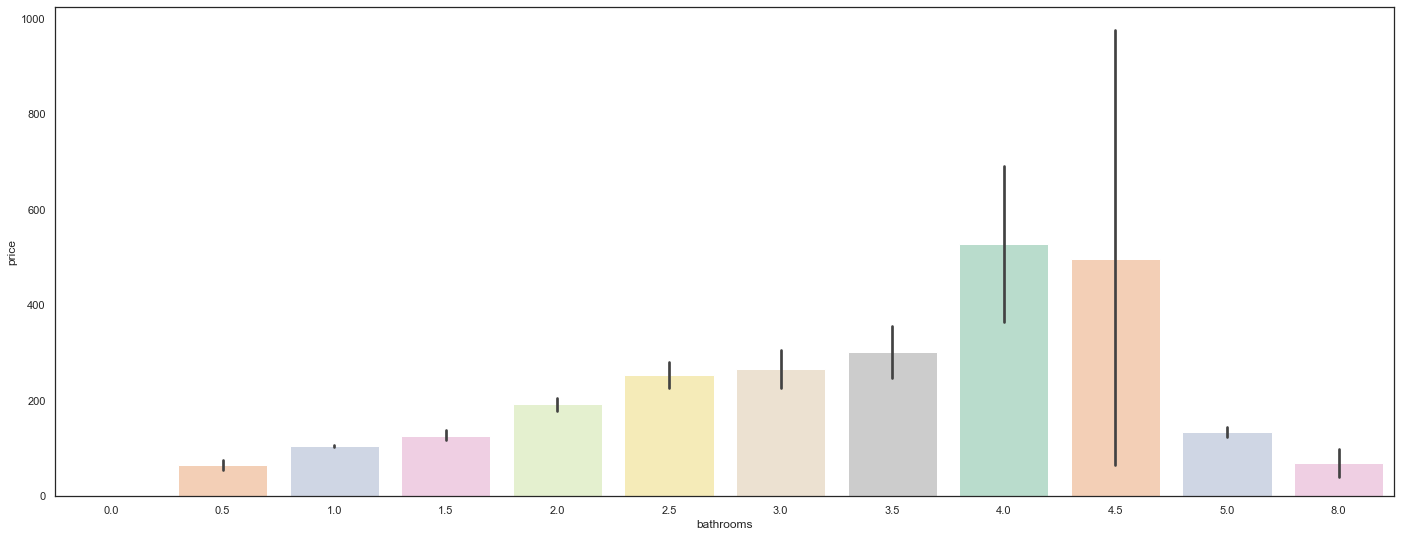

In [34]:
plt.figure(figsize=(24,9))
sb.barplot(x=listings['bathrooms'], y=listings['price'], palette="Pastel2")

Price of listing increases as number of bathrooms increases (until 4 bathrooms, then price drops)

# Conclusion

In this analysis we tried to see what factors affect the revenue of the airbnb listings. Below are the main takeaways:

We found out that the minimum number of nights has little to no correlation with revenue earned.

The months July, August and September has the highest number of bookings and revenue earned. Thus Summer is the most popular season to visit Seattle!

Downtown, Queen Anne and Cascade, which are located in the heart of Seattle, are the most popular places to rent an airbnb! Therefore raking in more revenue as the listings can afford to be pricier.

Interestingly, good ratings does not equate to more revenue earned. The correlation is too low.

Lastly, we did an in-depth analysis of what affects the price of the listings. Price of the listings can be maximised by increasing the number of bedrooms, bathrooms, and renting out the whole apartment.

And to cross check all of these findings, we actually did an analysis of user reviews, all the way at the start of this notebook. No surprise, the reviews actually do correspond with the factors that affect the price, great!